In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm,ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from pathlib import Path


In [2]:
DIR = Path(r'E:\fitness-prediction\runs')
folders = [path for path in DIR.iterdir() if path.is_dir()]

# Gather datasets

In [3]:
if Path(r'E:\fitness-prediction\saved-metrics.pkl').is_file():
    data = pd.read_pickle(r'E:\fitness-prediction\saved-metrics.pkl')


In [4]:
cmaps = ["light:#03012d","light:#d99e09"]
cmaps2 = ["#03012d","#d99e09"]


In [5]:
metric2 = data[data.type==2].fillna(0)

metric_list = list(metric2.columns.drop('total biomass'))

# Plot all possible metrics vs biomass

In [6]:
data.columns

Index(['mother_cell', 'type', 'Voronoi Area', 'IPTG', 'Time',
       'Distance from center', 'total biomass', 'Nearest 1', 'Nearest 2',
       'Nearest Neighbor', 'IC1', 'IC2', 'IC', 'Relative Neighbor Dist 1',
       'Relative Neighbor Dist 2', 'Relative Neighbor Dist', 'Z1', 'Z2',
       'Z1_2', 'Z2_1', 'LogNearest 1', 'LogNearest 2', 'LogNearest', 'Inv1',
       'Inv2', 'Log Inv1', 'Log Inv2', 'Colony Area', 'initial biomass'],
      dtype='object')

In [7]:
data

,mother_cell,type,Voronoi Area,IPTG,Time,Distance from center,total biomass,Nearest 1,Nearest 2,Nearest Neighbor,...,Z2_1,LogNearest 1,LogNearest 2,LogNearest,Inv1,Inv2,Log Inv1,Log Inv2,Colony Area,initial biomass
0,33,2,1.978817e-10,0.36692,97.222222,0.000042,18725.174159,1.068169e-05,0.000006,6.013393e-06,...,125.942342,-11.446980,-12.021521,-12.021521,9.361819e+04,166295.456827,22.893960,24.043043,15232.0,178.418964
1,32,2,1.943819e-10,0.36692,97.222222,0.000047,13613.387479,2.400483e-05,0.000004,4.053653e-06,...,84.898239,-10.637255,-12.415892,-12.415892,4.165827e+04,246691.090842,21.274511,24.831784,11924.0,309.662175
2,20,2,4.030559e-10,0.36692,97.222222,0.000046,7314.070579,2.989025e-05,0.000005,4.605432e-06,...,96.454498,-10.417978,-12.288274,-12.288274,3.345573e+04,217134.916354,20.835957,24.576548,6598.0,164.700681
3,26,2,7.323750e-10,0.36692,97.222222,0.000035,12999.941624,1.687371e-05,0.000009,9.452322e-06,...,197.966032,-10.989754,-11.569250,-11.569250,5.926379e+04,105794.105481,21.979507,23.138500,11925.0,131.594619
4,14,2,9.573191e-10,0.36692,97.222222,0.000046,21866.197226,1.254053e-05,0.000006,6.013393e-06,...,125.942342,-11.286545,-12.021521,-12.021521,7.974144e+04,166295.456827,22.573089,24.043043,15693.0,213.345049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,3,1,2.044298e-09,0.02123,97.222222,0.000050,360743.295668,3.564515e-05,0.000006,5.577490e-06,...,174.689003,-10.241898,-12.096772,-12.096772,2.805431e+04,179292.103583,20.483795,24.193543,84957.0,854.539005
91,4,1,6.977255e-09,0.02123,97.222222,0.000013,535526.268738,1.774832e-05,0.000003,3.361547e-06,...,105.284866,-10.939220,-12.603109,-12.603109,5.634336e+04,297482.058654,21.878439,25.206218,118240.0,1266.849913
92,9,1,3.902051e-09,0.02123,97.222222,0.000038,332272.304106,8.139410e-07,0.000004,8.139410e-07,...,117.909816,-14.021378,-12.489859,-14.021378,1.228590e+06,265629.782806,28.042756,24.979718,72333.0,590.614837
93,5,1,0.000000e+00,0.02123,97.222222,0.000048,577973.344035,1.815485e-05,0.000005,5.195306e-06,...,162.718834,-10.916573,-12.167755,-12.167755,5.508171e+04,192481.459635,21.833146,24.335510,119251.0,1414.508417


In [8]:
from matplotlib import transforms
def label_panel(ax, letter, *,
                offset_left=0.1, offset_up=0.1, prefix='', postfix='', **font_kwds):
    kwds = dict(fontsize=18)
    kwds.update(font_kwds)
    # this mad looking bit of code says that we should put the code offset a certain distance in
    # inches (using the fig.dpi_scale_trans transformation) from the top left of the frame
    # (which is (0, 1) in ax.transAxes transformation space)
    fig = ax.figure
    trans = ax.transAxes + transforms.ScaledTranslation(-offset_left, offset_up, fig.dpi_scale_trans)
    ax.text(0, 1, prefix+letter+postfix, transform=trans, **kwds)

def label_panels(axes, letters=None, **kwds):
    if letters is None:
        letters = axes.keys()
    for letter in letters:
        ax = axes[letter]
        label_panel(ax, letter, **kwds)

In [9]:
def colorFader(c1,c2,n): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    
    mix = np.linspace(0,1,n+1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    cols = list()
    for i in range(n):
        cols.append(mpl.colors.to_hex((1-mix[i])*c1 + mix[i]*c2))
    return cols
def colorFaderRGB(c1,c2,n): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)

    mix = np.linspace(0,1,n+1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    cols = list()
    for i in range(n):
        cols.append(tuple((((1-mix[i])*c1 + mix[i]*c2)*256).astype('int')))
    return cols
def cbar_inset(ax):
    axins = inset_axes(ax,
                        width="5%",  # width = 50% of parent_bbox width
                        height="40%",  # height : 5%
                        loc='upper left')
    return axins


In [10]:
data = data.dropna()

In [11]:
data.columns

Index(['mother_cell', 'type', 'Voronoi Area', 'IPTG', 'Time',
       'Distance from center', 'total biomass', 'Nearest 1', 'Nearest 2',
       'Nearest Neighbor', 'IC1', 'IC2', 'IC', 'Relative Neighbor Dist 1',
       'Relative Neighbor Dist 2', 'Relative Neighbor Dist', 'Z1', 'Z2',
       'Z1_2', 'Z2_1', 'LogNearest 1', 'LogNearest 2', 'LogNearest', 'Inv1',
       'Inv2', 'Log Inv1', 'Log Inv2', 'Colony Area', 'initial biomass'],
      dtype='object')

In [24]:
def plot_loghist(x,y,cmap,ax,ylog,bins=40):
    xbins = np.geomspace(x.min(), x.max())
    if ylog == True:
        ybins = np.geomspace(y.min(), y.max(), bins)
        
        ax.set_yscale('log')
    else:
        ybins = bins
    _,_,_,im=ax.hist2d(x,y,cmap=cmap,bins=(xbins,ybins))
    ax.set_xscale('log')
    return im

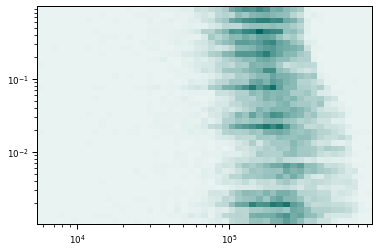

In [20]:
cya = sns.light_palette('#01665e', as_cmap=True)
f, ax =plt.subplots()
plot_loghist(data.loc[(data.type==1),'total biomass'],data.loc[(data.type==1),'IPTG'],ax=ax,cmap=cya,ylog=True)

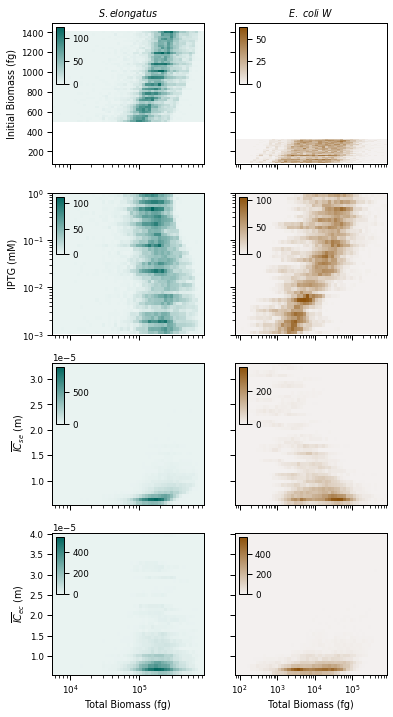

In [28]:
sns.set_context('paper')
def cbar_inset(ax):
    axins = inset_axes(ax,
                        width="5%",  # width = 50% of parent_bbox width
                        height="40%",  # height : 5%
                        loc='upper left')
    return axins
nbins=40
ms = 10
a=0.5
labels=['Initial Biomass (fg)','IPTG (mM)',r' $\overline{IC}_{se}$ (m)',r' $\overline{IC}_{ec}$ (m)']
features = ['initial biomass', 'IPTG','IC1','IC2']
fig = plt.figure(figsize=(6,12))
my_gridspec = gridspec.GridSpec(len(features), 2, figure=fig,wspace=.2,hspace=.2)
#f, axes = plt.subplots(ncols=2,nrows=len(selected_features),figsize=(4,16))
logs = [False,True,False,False]
axes = my_gridspec.subplots(sharex='col', sharey='row')#
lvls = 20
for met,ax,lgs in zip(features,axes[:,0],logs):
   d1 = data.loc[data.type==1]
    
   #cya = colorFader('#01665e','#c7eae5',lvls)
   cya = sns.light_palette('#01665e', as_cmap=True)
   #sns.histplot(x='total biomass',y=met,data=d1,ax=ax,log_scale=lgs,cmap=cya,bins=nbins,cbar=True,cbar_ax=cbar_inset(ax))
   im=plot_loghist(d1['total biomass'],d1[met],cmap=cya,ax=ax,ylog=lgs)
   plt.colorbar(im,cax=cbar_inset(ax))
   #ax.scatter(x=d1['total biomass'],y=d1[met],s=ms,c=cya,alpha=a,ec='k',lw=.5,rasterized=True)
    
   ax.set_ylabel(met)
   #ax.set_xlim(1e3,1e7)
   #
for met,ax,lgs in zip(features,axes[:,1],logs):
   d2 = data.loc[data.type==2]
   #ecw = colorFader('#8c510a','#f6e8c3',len(d2[met]))
   ecw = sns.light_palette('#8c510a',as_cmap=True)
   im=plot_loghist(d2['total biomass'],d2[met],cmap=ecw,ax=ax,ylog=lgs)
   plt.colorbar(im,cax=cbar_inset(ax))
   #ax.scatter(x=d2['total biomass'],y=d2[met],s=ms,c=ecw,alpha=a,ec='k',lw=.5,rasterized=True)
   ax.set_ylabel(met)
   
   #ax.set_xlim(1e1,1e7)
   #sns.scatterplot(x='total biomass',y=met,hue='type',data=data,ax=ax)
for ax in axes.ravel():
   ax.set_xscale('log')
   
for ax in axes[:,1]:
   ax.set_ylabel('')
#axes[-1,0].set_xlabel('Total Biomass (fg)')  
#for i in [0,2,3]:
#   axes[i,0].set_yscale('log')
#   axes[i,1].set_yscale('log')
axes[-1,0].set_xlabel('Total Biomass (fg)')
axes[-1,1].set_xlabel('Total Biomass (fg)')
axes[0,0].set_title(r'$\it{S. elongatus}$')
axes[0,1].set_title(r'$\it{E.}$ $\it{coli}$ $\it{W}$')
for ax,label in zip(axes[:,0],labels):
   ax.set_ylabel(label)
#fig.tight_layout()
for ax in axes[0,:].ravel():
   ax.set_ylim(7e1,1.5e3)
for ax in axes[1,:].ravel():
    ax.set_ylim(1e-3,1)

fig.savefig('../figures/spatial-metrics.pdf',bbox_inches='tight')
#fig.savefig('../figures/spatial-metrics-density.png',bbox_inches='tight',dpi=600)
plt.show()

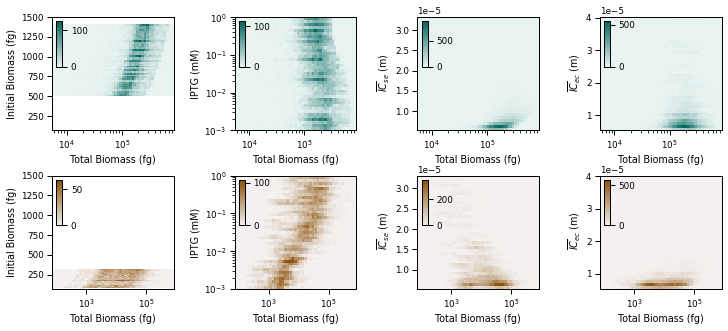

In [26]:
sns.set_context('paper')
def cbar_inset(ax):
    axins = inset_axes(ax,
                        width="5%",  # width = 50% of parent_bbox width
                        height="40%",  # height : 5%
                        loc='upper left')
    return axins
nbins=40
ms = 10
a=0.5
labels=['Initial Biomass (fg)','IPTG (mM)',r' $\overline{IC}_{se}$ (m)',r' $\overline{IC}_{ec}$ (m)']
features = ['initial biomass', 'IPTG','IC1','IC2']
fig = plt.figure(figsize=(12,5))
my_gridspec = gridspec.GridSpec(2,len(features), figure=fig,wspace=.5,hspace=.4)
#f, axes = plt.subplots(ncols=2,nrows=len(selected_features),figsize=(4,16))
logs = [False,True,False,False]
axes = my_gridspec.subplots(sharex='row', sharey='col')#
lvls = 20
for met,ax,lgs,label in zip(features,axes[0,:],logs,labels):
   d1 = data.loc[data.type==1]
    
   #cya = colorFader('#01665e','#c7eae5',lvls)
   cya = sns.light_palette('#01665e', as_cmap=True)
   #sns.histplot(x='total biomass',y=met,data=d1,ax=ax,log_scale=lgs,cmap=cya,bins=nbins,cbar=True,cbar_ax=cbar_inset(ax))
   im=plot_loghist(d1['total biomass'],d1[met],cmap=cya,ax=ax,ylog=lgs)
   plt.colorbar(im,cax=cbar_inset(ax))
   #ax.scatter(x=d1['total biomass'],y=d1[met],s=ms,c=cya,alpha=a,ec='k',lw=.5,rasterized=True)
    
   ax.set_ylabel(label)
   ax.set_xlabel('Total Biomass (fg)')
   #ax.set_title(r'$\it{S. elongatus}$')
   #ax.set_xlim(1e3,1e7)
   #
for met,ax,lgs,label in zip(features,axes[1,:],logs,labels):
   d2 = data.loc[data.type==2]
   #ecw = colorFader('#8c510a','#f6e8c3',len(d2[met]))
   ecw = sns.light_palette('#8c510a',as_cmap=True)
   im=plot_loghist(d2['total biomass'],d2[met],cmap=ecw,ax=ax,ylog=lgs)
   plt.colorbar(im,cax=cbar_inset(ax))
   #ax.scatter(x=d2['total biomass'],y=d2[met],s=ms,c=ecw,alpha=a,ec='k',lw=.5,rasterized=True)
   ax.set_ylabel(label)
   ax.set_xlabel('Total Biomass (fg)')
   #ax.set_title(r'$\it{E.}$ $\it{coli}$ $\it{W}$')
   #ax.set_xlim(1e1,1e7)
   #sns.scatterplot(x='total biomass',y=met,hue='type',data=data,ax=ax)
for ax in axes.ravel():
   ax.set_xscale('log')
   

#axes[-1,0].set_xlabel('Total Biomass (fg)')  
#for i in [0,2,3]:
#   axes[i,0].set_yscale('log')
#   axes[i,1].set_yscale('log')
# axes[-1,0].set_xlabel('Total Biomass (fg)')
# axes[-1,1].set_xlabel('Total Biomass (fg)') 

#for ax,label in zip(axes[0,:],labels):
   #ax.set_ylabel(label)
#fig.tight_layout()
for ax in axes[:,0].ravel():
   ax.set_ylim(7e1,1.5e3)
for ax in axes[:,1].ravel():
   ax.set_ylim(1e-3,1)

#fig.savefig('../figures/spatial-metrics-poster-wide.pdf',bbox_inches='tight')
#fig.savefig('../figures/spatial-metrics-density.png',bbox_inches='tight',dpi=600)
plt.show()